In [10]:
from collections import defaultdict
from typing import Dict, List, Tuple, Union

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib.ticker import EngFormatter

from utils.utils import get_labels_distribution, invert_dict, plot_data_distribution

In [196]:
labels = {
    "COVID": "COVID-19",
    "Lung_Opacity": "Lung Opacity",
    "Normal": "Normal",
    "Viral Pneumonia": "Viral Pneumonia"
}

num_clients = 8

file_paths = {
    "1": f"../datasets/csv_splits/{num_clients}_clients/unbalanced_all_classes/CXR_covid_train_client_1.csv",
    "2": f"../datasets/csv_splits/{num_clients}_clients/unbalanced_all_classes/CXR_covid_train_client_2.csv",
}

if num_clients >= 4:
    file_paths["3"] = f"../datasets/csv_splits/{num_clients}_clients/unbalanced_all_classes/CXR_covid_train_client_3.csv"
    file_paths["4"] = f"../datasets/csv_splits/{num_clients}_clients/unbalanced_all_classes/CXR_covid_train_client_4.csv"

if num_clients == 8:
    file_paths["5"] = f"../datasets/csv_splits/{num_clients}_clients/unbalanced_all_classes/CXR_covid_train_client_5.csv"
    file_paths["6"] = f"../datasets/csv_splits/{num_clients}_clients/unbalanced_all_classes/CXR_covid_train_client_6.csv"
    file_paths["7"] = f"../datasets/csv_splits/{num_clients}_clients/unbalanced_all_classes/CXR_covid_train_client_7.csv"
    file_paths["8"] = f"../datasets/csv_splits/{num_clients}_clients/unbalanced_all_classes/CXR_covid_train_client_8.csv"

# data = {key: pd.read_csv(value)["Finding Labels"] for key, value in file_paths.items()}
data = {key: get_labels_distribution(pd.read_csv(value), "Finding Labels", labels) for key, value in file_paths.items()}
data = invert_dict(data)

In [197]:
def get_percentage(data_dict: Dict[str, Dict[str, int]]) -> Dict[str, Dict[str, float]]:
    percentage_dict = {}
    for key, value in data_dict.items():
        total = sum(value.values())
        percentage_dict[key] = {k: round((v/total) * 100, 2) for k, v in value.items()}
    return percentage_dict

# data_percentage = get_percentage(invert_dict(data))
data_percentage = get_percentage(data)
data_percentage

{'Viral Pneumonia': {'1': 24.81,
  '2': 11.71,
  '3': 1.21,
  '4': 6.13,
  '5': 18.4,
  '6': 3.35,
  '7': 31.51,
  '8': 2.88},
 'COVID-19': {'1': 6.33,
  '2': 26.21,
  '3': 5.05,
  '4': 2.42,
  '5': 11.0,
  '6': 5.84,
  '7': 42.29,
  '8': 0.86},
 'Normal': {'1': 0.66,
  '2': 35.57,
  '3': 17.26,
  '4': 3.97,
  '5': 4.15,
  '6': 17.11,
  '7': 2.43,
  '8': 18.85},
 'Lung Opacity': {'1': 0.15,
  '2': 5.12,
  '3': 6.65,
  '4': 28.86,
  '5': 21.31,
  '6': 9.9,
  '7': 3.33,
  '8': 24.68}}

In [198]:
def load_style(font_name="Arial", palette="muted", n_colors=None, font_scale=1.3):
    sns.set_theme(
        context="notebook",
        style="whitegrid", 
        # palette="colorblind",
        font=font_name, 
        font_scale=font_scale
    )
    colors = sns.color_palette(palette, n_colors=n_colors)
    
    plt.rcParams.update({
        # "font.family": "sans-serif",
        # "font.sans-serif": ["Helvetica"],
        'mathtext.fontset': 'custom',
        'mathtext.rm': f'{font_name}',
        'mathtext.it': f'{font_name}:italic',
        'mathtext.bf': f'{font_name}:bold'
    })

    # Use LaTeX for text
    # plt.rcParams.update({
    #     "text.usetex": True,
    #     "font.family": "Helvetica"
    # })
    
    return colors


def plot_data_distribution(
    data: Dict[str, Dict[str, int]],
    title: str,
    xy_labels: Dict[str, str] = None,
    plot_size: Tuple[int, int] = (12, 8),
):
    """
    Plot the distribution of the data with clients as y-labels and classes as labels.

    Args:
    -----
        data (Dict[str, Dict[str, int]]): The data to plot.
        title (str): The title of the plot.
        xy_labels (Dict[str, str]): Labels for x and y axes.
        plot_size (Tuple[int, int]): The size of the plot.
    """
    if not isinstance(data, dict):
        raise ValueError("Data must be a dictionary.")
    
    # sns.set(style="whitegrid")
    fig, ax = plt.subplots(figsize=plot_size, dpi=300)

    # Prepare data for plotting
    plot_data = []
    for category, clients in data.items():
        for client, value in clients.items():
            plot_data.append({"Client": client, "Category": category, "Value": value})

    # Convert to DataFrame for sorting purposes
    plot_df = pd.DataFrame(plot_data)
    plot_df = plot_df.sort_values(by=["Client", "Category"])

    style = load_style(font_name="DejaVu Sans", palette="colorblind", n_colors=len(data.keys()))

    sns.barplot(
        data=plot_df,
        x="Value",
        y="Client",
        hue="Category",
        palette=style,
        # width=0.4,
        ax=ax,
    )

    formatter = EngFormatter()

    # Customize plot
    fontsize = 16
    ax.set_title(title)
    ax.set_xlabel(xy_labels.get("x", "Values"))
    ax.set_ylabel(xy_labels.get("y", "Clients"))
    ax.legend(
        # title="Class",
        # fontsize=14,
        # prop={"size": fontsize}
    )

    # # Remove y-axis label (for paper purposes)
    # ax.set_ylabel("")
    
    ax.xaxis.set_major_formatter(formatter)

    plt.tight_layout()
    plt.show()

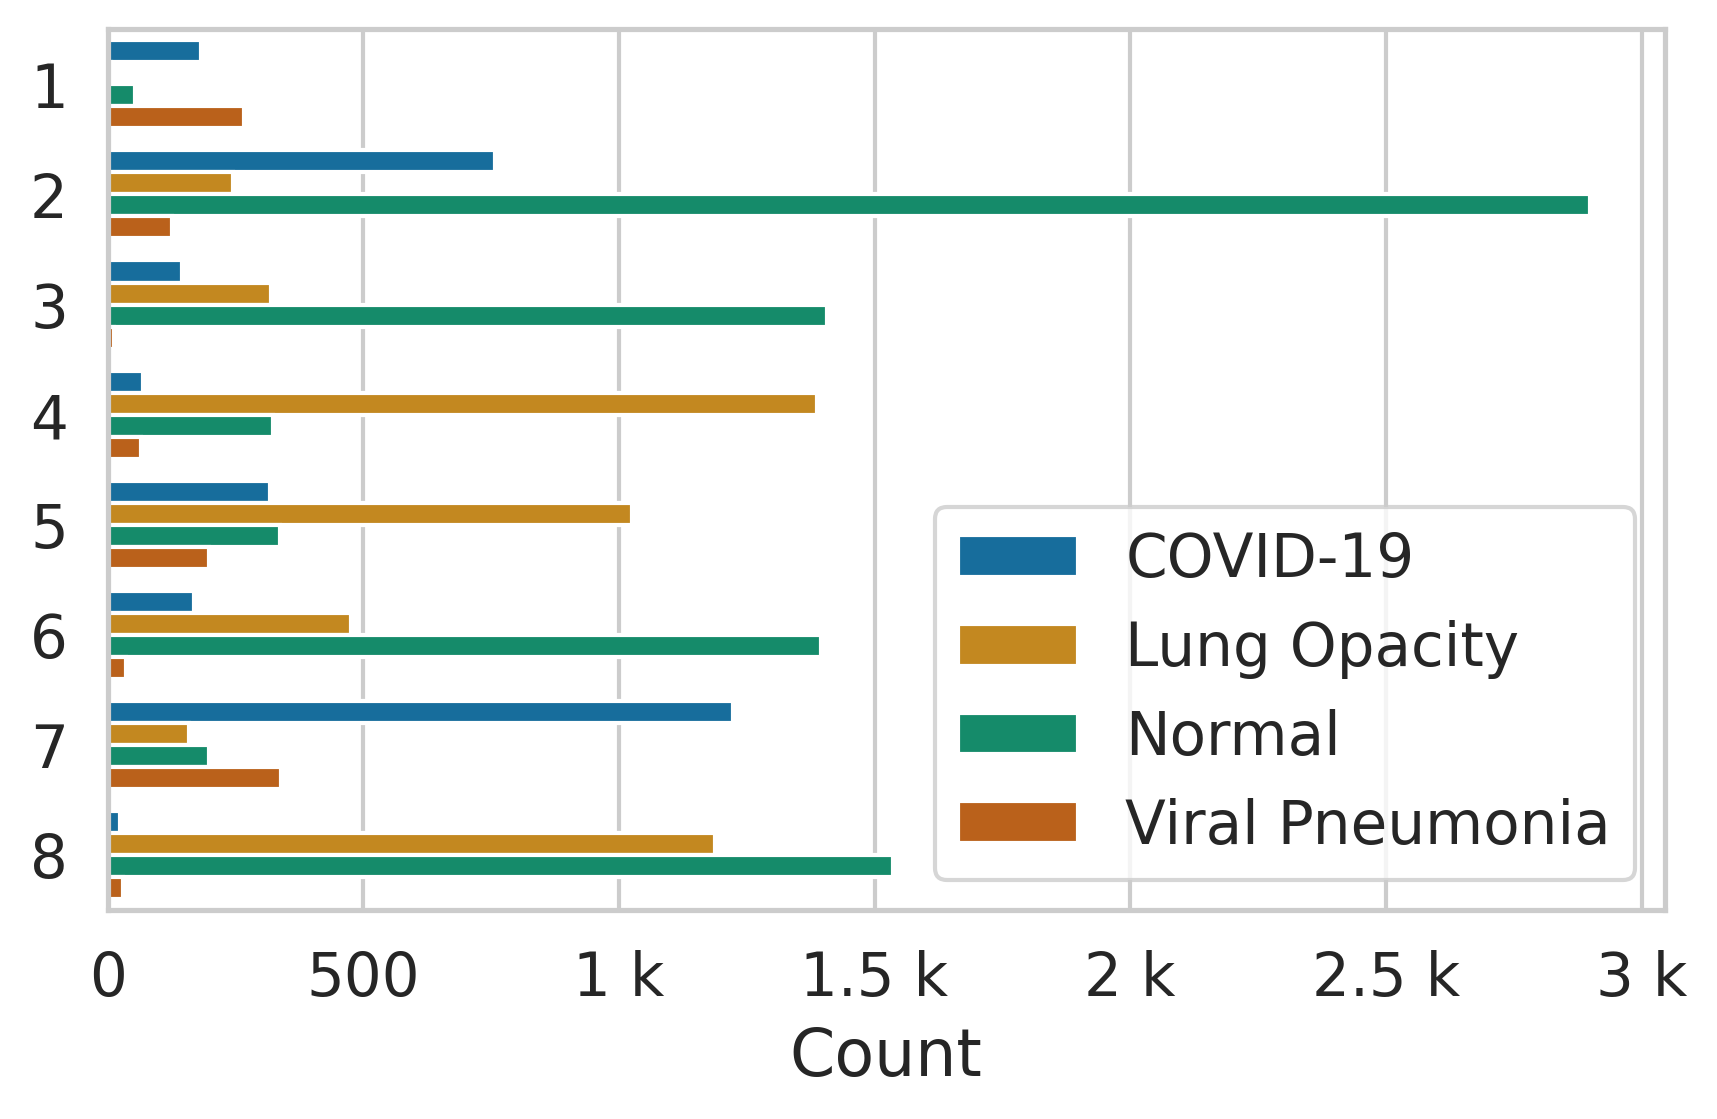

In [199]:
plot_data_distribution(data, title="", xy_labels={"x": "Count", "y": "Clients"}, plot_size=(6, 4))

In [312]:
def plot_evolution_curves(data: pd.DataFrame, xy_labels: Dict[str, str] = None, legends: dict = None, plot_size: Tuple[int, int] = (12, 8), title: str = "", fontsize: int = 12):
    """Plot the evolution of curves (loss or score).

    Args:
    -----
        data (pd.DataFrame): Data to plot (multiple columns).
        labels (Dict[str, str]): Labels for the classes.
        title (str): Title of the plot.
    """
    fig, ax = plt.subplots(figsize=plot_size, dpi=300)

    style = load_style(font_name="DejaVu Sans", palette="colorblind", n_colors=len(data.columns), font_scale=1.3)

    # # Sort the columns by their name
    # data = data.sort_index(axis=1)
    
    sns.lineplot(
        data=data,
        palette=style,
        ax=ax
    )

    ax.set_title(title)
    if xy_labels:
        ax.set_xlabel(xy_labels["x"])
        ax.set_ylabel(xy_labels["y"])
    # ax.tick_params(axis="both", which="major")

    # Comment the 3 lines below when using CT heart loss files
    handles, _legends = ax.get_legend_handles_labels()
    legends = [legends[leg] for leg in _legends]
    ax.legend(handles=handles, labels=legends)

    # Set x-axis limits
    # ax.set_xlim(0, data.shape[0] - 1)
    ax.set_xlim(0, 65)
    plt.show()


def filter_data(data: Dict[str, pd.DataFrame], pattern: List[str], columns_names: Dict[str, str]) -> Dict[str, pd.DataFrame]:
    """Filter the data to keep only the columns of interest.
    All the columns that contain the pattern will be dropped.

    Args:
    -----
        data (Dict[str, pd.DataFrame]): Data to filter.
        pattern (List[str]): Pattern to remove from the columns.
        columns_names (Dict[str, str]): dictionnary with the new column names as keys and the old column names as values.

    Returns:
    --------
        Dict[str, pd.DataFrame]: Filtered data.
    """
    filtered_data = {}
    for key, value in data.items():
        filtered_data[key] = value.drop(columns=[col for col in value.columns if any([p in col for p in pattern])])
        
        # # Uncomment both lines below when comparing CL and FL results or when using mean loss files
        # Filtered FL
        filtered_data[key].set_index("Step", inplace=True)
        # # Unfiltered CT
        # filtered_data[key].set_index("trainer/global_step", inplace=True)
        filtered_data[key] = filtered_data[key].rename(columns=columns_names[key])

    return filtered_data
    

def merge_data(data: Dict[str, pd.DataFrame], sort: bool = False, reindex: bool = False) -> pd.DataFrame:
    """Merge the data of all the clients into a single DataFrame.
    As each DataFrames have the same 'Step' column, only the first one will be kept.

    Args:
    -----
        data (Dict[str, pd.DataFrame]): Data to merge.
        sort (bool): If True, sort the columns by their name.
        reindex (bool): If True, reassign the steps to go from 0 to n.

    Returns:
    --------
        pd.DataFrame: Merged data.
    """
    df = pd.concat(data.values(), axis=1)
    # df = df.loc[:, ~df.columns.duplicated()]

    if reindex:
        df = df.reset_index(drop=True)
        df.index = np.arange(0, len(df))
        df.index.name = "Step"

    if sort:
        df = df.sort_index(axis=1)
        
    return df

In [313]:
# cl = pd.read_csv(f"../results/fl/cl_{curve_type}.csv")

# # Rename "epoch" to "Step"
# cl = cl.rename(columns={"epoch": "Step"})
# cl.to_csv(f"../results/fl/cl_{curve_type}.csv", index=False)
# cl.head()

In [345]:
curve_type = "loss"

curves_paths = {
    # CT scans
    "ct_loss": f"../results/fl/ct_heart_{curve_type}_clean.csv",
    # "fl_2_clients_global_ct_unbalanced_all_classes": f"../results/fl/ct_heart_{curve_type}_2_clients_cxr_balanced_all_classes.csv",
    "fl_2_clients_global_ct_unbalanced_all_classes": f"../results/fl/ct_heart_{curve_type}_2_clients_cxr_balanced_all_classes_clean.csv",

    # Only for CXR (CT below)
    # "cl_loss": f"../results/fl/cl_{curve_type}.csv",
    # "cl_loss": f"../results/fl/cl_{curve_type}_latest.csv",
    # "fl_2_clients_global_cxr_balanced_all_classes": f"../results/fl/2_clients/paper/csv/2_clients_global_cxr_balanced_all_classes_{curve_type}.csv",
    # "fl_4_clients_global_cxr_balanced_all_classes": f"../results/fl/4_clients/paper/csv/4_clients_global_cxr_balanced_all_classes_{curve_type}.csv",
    # "fl_8_clients_global_cxr_balanced_all_classes": f"../results/fl/8_clients/paper/csv/8_clients_global_cxr_balanced_all_classes_{curve_type}.csv",
    
    # "2_clients_global_cxr_balanced_all_classes": f"../results/curves/2_clients_cxr_balanced_all_classes_mean.csv",
    # "2_clients_global_cxr_unbalanced_all_classes_loss": f"../results/curves/2_clients_global_cxr_class_ratio_unbalanced_all_classes_{curve_type}_mean.csv",

    # "2_clients_global_cxr_balanced_all_classes": f"../results/fl/2_clients/paper/csv/2_clients_global_cxr_balanced_all_classes_{curve_type}.csv",
    # "2_clients_global_cxr_unbalanced_all_classes_loss": f"../results/fl/2_clients/paper/csv/2_clients_global_cxr_unbalanced_all_classes_{curve_type}.csv",
    # "2_clients_global_cxr_balanced_missing_2CO_loss": f"../results/fl/2_clients/paper/csv/2_clients_global_cxr_balanced_missing_2CO_{curve_type}.csv",
    # "2_clients_global_cxr_balanced_missing_CO-LO_loss": f"../results/fl/2_clients/paper/csv/2_clients_global_cxr_balanced_missing_CO-LO_{curve_type}.csv",

    # "4_clients_cxr_balanced_all_classes": f"../results/curves/4_clients_cxr_balanced_all_classes_mean.csv",
    # "4_clients_global_cxr_class_ratio_unbalanced_all_classes_loss": f"../results/curves/4_clients_global_cxr_class_ratio_unbalanced_all_classes_loss_mean.csv",
    # "4_clients_global_cxr_unbalanced_all_classes_loss": f"../results/fl/4_clients/paper/csv/4_clients_global_cxr_class_ratio_unbalanced_all_classes_{curve_type}.csv",
    # "4_clients_global_cxr_unbalanced_missing_2LO_3N_loss": f"../results/fl/4_clients/paper/csv/4_clients_global_cxr_unbalanced_missing_2LO_3N_{curve_type}.csv",
    # "4_clients_global_cxr_balanced_missing_2CO-LO_4N_loss": f"../results/fl/4_clients/paper/csv/4_clients_global_cxr_balanced_missing_2CO-LO_4N_{curve_type}.csv",

    # "8_clients_global_cxr_balanced_all_classes": f"../results/fl/8_clients/paper/csv/8_clients_global_cxr_balanced_all_classes_{curve_type}.csv",
    # "8_clients_global_cxr_class_ratio_unbalanced_all_classes": f"../results/curves/8_clients_global_cxr_class_ratio_unbalanced_all_classes_{curve_type}_mean.csv",
}

curves = {key: pd.read_csv(value) for key, value in curves_paths.items()}

columns = {
    key: {
        col: key
        # col: col.split("-")[1].strip()
        for col in value.columns
        # if col.startswith("Group") and col.endswith("loss")
    }
    for key, value in curves.items()
}

legends = {
    # CT scans
    "ct_loss": "FL - 2 clients (balanced)",
    "fl_2_clients_global_ct_unbalanced_all_classes": "FL - 2 clients (unbalanced)",

    # # CXR
    "cl_loss": "CL",
    "fl_2_clients_global_cxr_balanced_all_classes": "FL - 2 clients",
    "fl_4_clients_global_cxr_balanced_all_classes": "FL - 4 clients",
    "fl_8_clients_global_cxr_balanced_all_classes": "FL - 8 clients",

    "2_clients_cxr_balanced_all_classes": "FL - 2 clients (balanced)",
    "2_clients_global_cxr_class_ratio_unbalanced_all_classes": "FL - 2 clients (unbalanced)",
    # "2_clients_global_cxr_balanced_missing_2CO_loss": "FL - 2 clients (data configuration (b))", # target: CO
    # "2_clients_global_cxr_balanced_missing_CO-LO_loss": "FL - 2 clients (data config. (c))", # target: CO and LO

    "4_clients_cxr_balanced_all_classes": "FL - 4 clients (balanced)",
    "4_clients_global_cxr_class_ratio_unbalanced_all_classes": "FL - 4 clients (unbalanced)",
    # "4_clients_global_cxr_unbalanced_missing_2LO_3N_loss": "FL - 4 clients (data config. (e))", # target: LO and N
    # "4_clients_global_cxr_balanced_missing_2CO-LO_4N_loss": "FL - 4 clients (data config. (f))" # target: CO, LO and N

    "8_clients_global_cxr_balanced_all_classes": "FL - 8 clients (balanced)",
    "8_clients_global_cxr_class_ratio_unbalanced_all_classes": "FL - 8 clients (unbalanced)"
}

# Uncomment the following 2 lines when using CXR curves
curves = filter_data(curves, ["MIN", "MAX", " _step"], columns)
curves = merge_data(curves, sort=True, reindex=True)

# # Uncomment the following line when using CT scans curves
# curves = pd.read_csv(f"../results/fl/ct_heart_{curve_type}.csv")

# Uncomment the following line when using files containing Step
# curves.set_index("Step", inplace=True)

In [346]:
curves

# # Keep only "FL – 2 Clients" column
# fl_2_curve = curves.loc[:, ["FL – 2 Clients"]]
# fl_2_curve.index.name = "Step"
# fl_2_curve

# curves = curves.iloc[:70, :]
# curves

# # # curves.to_csv(f"../results/fl/8_clients/paper/csv/8_clients_global_cxr_balanced_all_classes_{curve_type}.csv")
# curves.to_csv(f"../results/fl/ct_heart_{curve_type}_2_clients_cxr_balanced_all_classes_clean.csv")
# fl_2_curve.to_csv(f"../results/fl/ct_heart_{curve_type}_clean.csv")

,ct_loss,fl_2_clients_global_ct_unbalanced_all_classes
Step,,
0,3.763419,4.424736
1,3.387931,3.107874
2,3.150005,2.605851
3,2.685778,2.379455
4,2.432545,2.282274
...,...,...
65,2.013623,1.906192
66,2.005971,1.911468
67,2.003328,1.912924


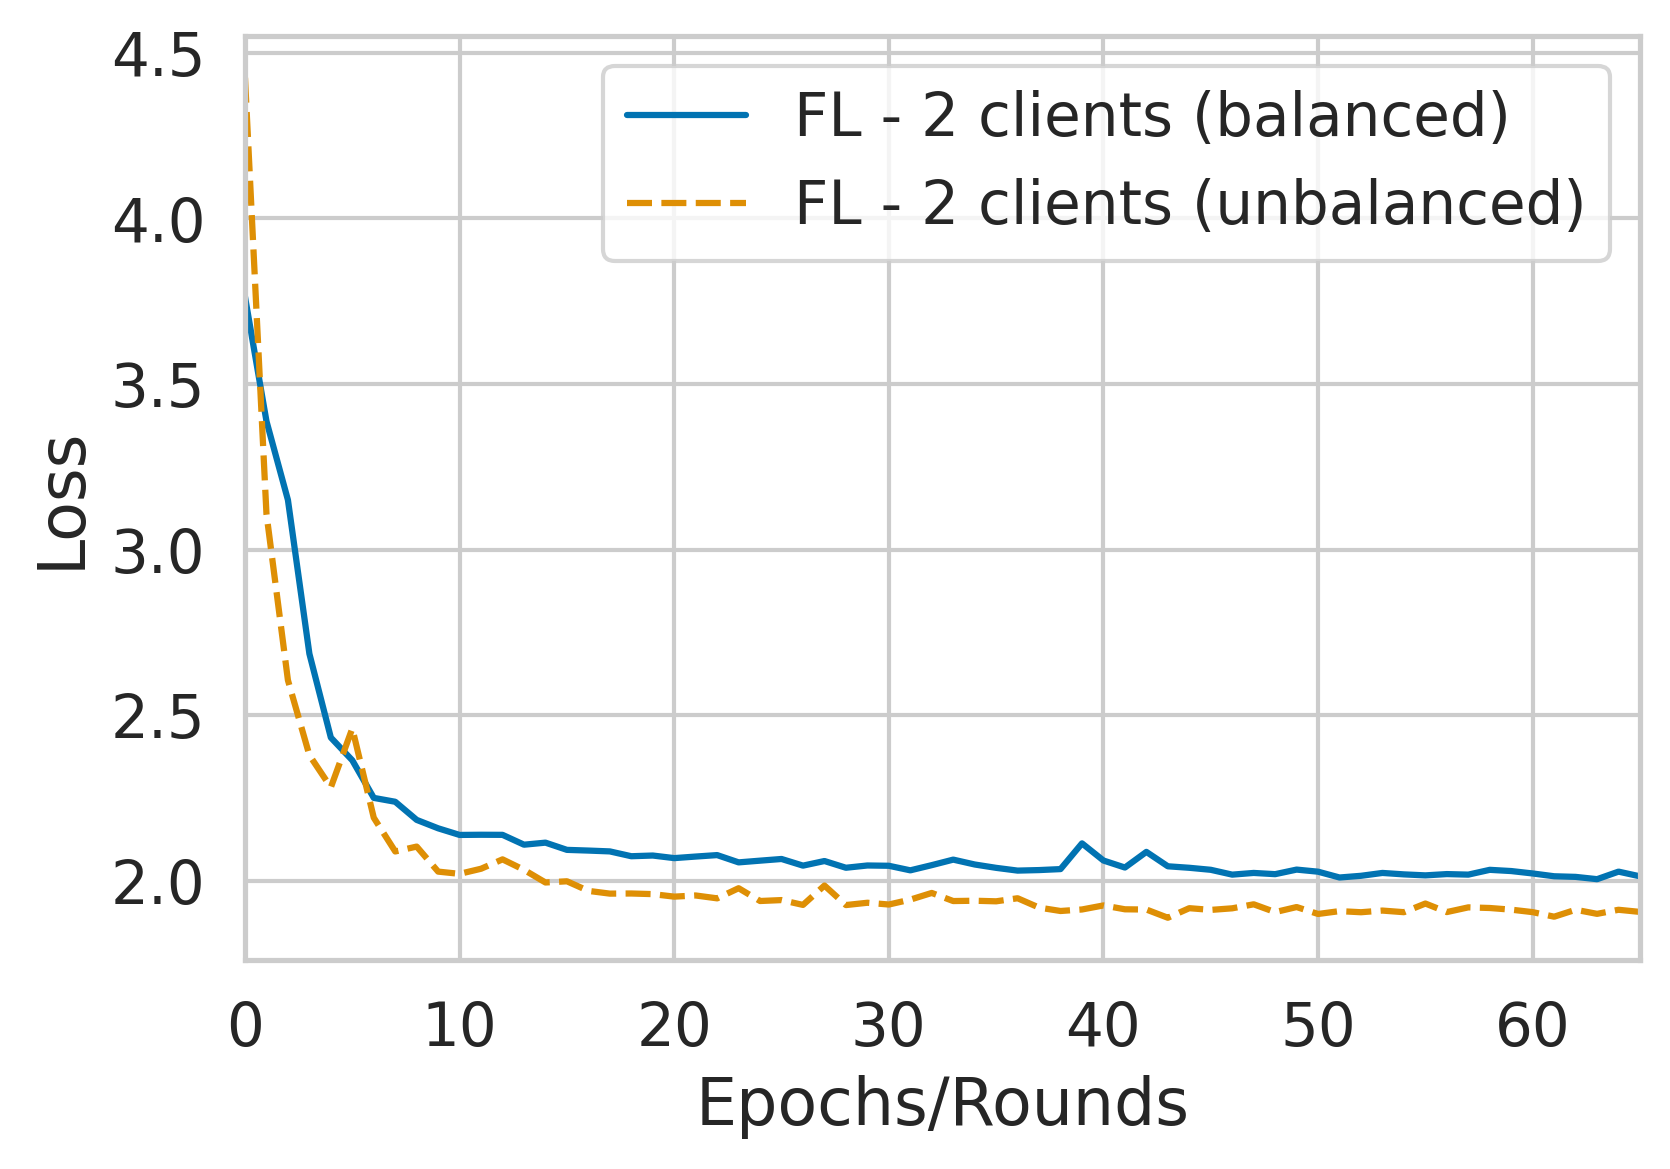

In [347]:
plot_evolution_curves(curves, xy_labels={"x": "Epochs/Rounds", "y": "Loss"}, legends=legends, plot_size=(6, 4), fontsize=10)

In [ ]:
# # # # Mean of the curves
# mean_curves = curves.mean(axis=1).to_frame(name="8_clients_global_cxr_class_ratio_unbalanced_all_classes")

# mean_curves.to_csv(f"../results/curves/8_clients_global_cxr_class_ratio_unbalanced_all_classes_loss_mean.csv")

# mean_curves

,8_clients_global_cxr_class_ratio_unbalanced_all_classes
Step,
0,1.615102
1,0.957261
2,0.821463
3,0.768499
4,0.682520
...,...
65,0.218548
66,0.283821
67,0.274853


In [348]:
metrics_file = f"../results/fl/ct_heart_metrics_2_clients_unbalanced.csv"
metrics = pd.read_csv(metrics_file)

In [349]:
metrics

,metric,DSC,DSC.1,HD,HD.1
0,structure,Myo,LV,Myo,LV
1,ct_ts0335,0.8725621557266532,0.9142397561819708,4.242640687119285,3.7416573867739413
2,ct_ts0465,0.8650537801070561,0.932875093975423,5.0990195135927845,5.385164807134504
3,ct_ts0532,0.9191767903708973,0.9559640030043954,3.1622776601683795,2.449489742783178
4,ct_ts0767,0.8483081599130307,0.9057265597307034,4.0,5.744562646538029
5,ct_ts0879,0.9299451546356262,0.9550628654220125,2.23606797749979,2.23606797749979
6,ct_ts0954,0.8775474719754972,0.9340834701991347,3.7416573867739413,3.7416573867739413
7,ct_ts1052,0.8949774067962577,0.9433237616664873,2.449489742783178,2.23606797749979
8,ct_ts1254,0.9011024093390422,0.9502728728450641,2.449489742783178,2.23606797749979
9,ct_ts1259,0.7604272284317525,0.8705636503522607,16.911534525287763,16.583123951777


In [352]:
dsc_myo = metrics["DSC"][1:]
dsc_lv = metrics["DSC.1"][1:]

hd_myo = metrics["HD"][1:]
hd_lv = metrics["HD.1"][1:]

In [356]:
_metrics = pd.DataFrame({
    "DSC Myocardium": dsc_myo,
    "DSC LV": dsc_lv,
    "HD Myocardium": hd_myo,
    "HD LV": hd_lv
}, dtype=float)

_metrics

,DSC Myocardium,DSC LV,HD Myocardium,HD LV
1,0.872562,0.914240,4.242641,3.741657
2,0.865054,0.932875,5.099020,5.385165
3,0.919177,0.955964,3.162278,2.449490
4,0.848308,0.905727,4.000000,5.744563
5,0.929945,0.955063,2.236068,2.236068
6,0.877547,0.934083,3.741657,3.741657
7,0.894977,0.943324,2.449490,2.236068
8,0.901102,0.950273,2.449490,2.236068
9,0.760427,0.870564,16.911535,16.583124
10,0.913864,0.946683,3.162278,2.828427


In [362]:
# Mean and std by column
mean_metrics = _metrics.mean()
std_metrics = _metrics.std()

print(mean_metrics)
print(std_metrics)

DSC Myocardium    0.843939
DSC LV            0.905280
HD Myocardium     9.386602
HD LV             8.418819
dtype: float64
DSC Myocardium    0.053715
DSC LV            0.041958
HD Myocardium     6.874185
HD LV             5.198531
dtype: float64
